# Introduction

The purpose nof this worksheet is to try to find an equilibrium in firms wages for the directed search game with incomplete information.  To do this, we need to find equilibrium mixed strategies for all pairs $ (w_1,w_2) $ of wages.  This is complicated because the equilibrium strategies depend on how far apart the wages of the two firms are.

We'll assume in this worksheet that $ Y_1 > Y_2 $ so that we should evenutally find an equilibrium where $w_1$ is larger than $w_2$.  We'll try ot establish that here by restricting attention to wages $w_1 \ge w_2$.

As we discussed, there are two important thresholds we'll have to analyze.  The first occurs at $ w_1=w_2 $, because we are going to want to check whether firm 1's profits are such that firm 1 would like to set a higher wage than firm 2 by checking the derivative of the profit function at this threshoold.

The other important instance is the one where $ \lambda \frac{w_1}{2} +(1-\lambda w_1 = w_2$, for at this point the type H worker switches from a mixed strategy to a pure one.


# Large difference between $w_1$ and $w_2$

We can start with the case where $\lambda\frac{w_1}{2}+(1-\lambda)\ge w_2$. Then as we argued in class, there will be an equilibrium in which the type $H$ worker will apply to firm 1 for sure.

In that case, as long as applying to firm 2 is not a dominated strategy for a type L worker (i.e, $(1-\lambda)\frac{w_1}{2}\le w_2$), there will be a mixed strategy equilibrium in which type $L$  workers apply to firm $1$ with probability $\pi$.  The value for $\pi$ must satisfy
$$
(1-\lambda)\left\{\pi\frac{w_1}{2} + (1-\pi)w_1\right\} = \lambda w_2 +(1-\lambda)\left\{\pi w_2 +(1-\pi)\frac{w_2}{2}\right\}
$$


In [1]:
var('gamma','pi_H','pi_L','pi','w_1','w_2','Y_1','Y_2')
Firm1 = (1-gamma)*(pi*(w_1/2)+(1-pi)*w_1)
Firm2 = gamma*w_2+(1-gamma)*(pi*w_2+(1-pi)*(w_2/2))
LOW = solve(Firm1==Firm2,pi)
pieL = LOW[0].rhs()
show(pieL.full_simplify())

(2*(gamma - 1)*w_1 + (gamma + 1)*w_2)/((gamma - 1)*w_1 + (gamma - 1)*w_2)

Usually the solutions sagemath gives are not written in the most compact way, so you will typically want to rewrite the latex. But if the answer looks acceptable as is, you can have the notebook write the latex for you, as follows:

In [2]:
latex(pieL)

\frac{2 \, {\left(\gamma - 1\right)} w_{1} + {\left(\gamma + 1\right)} w_{2}}{{\left(\gamma - 1\right)} w_{1} + {\left(\gamma - 1\right)} w_{2}}

This model is complex, and it is easy to make small coding errors along the way.  For that matter it is easy to make conceptual errors as you construct code. So we should do two checks.  First, if $\lambda$ is $0$ then there are no high type workers, so the solution for $\pi_L$  should be the same as it was in the complete information case we discussed in class.

In [3]:
show(pieL.substitute(gamma=0))

(2*w_1 - w_2)/(w_1 + w_2)

That checks out.  The case where $\lambda=1$ is also useful.  If you are a low type worker facing a high type opponent for sure, then where would you apply?

You can't use sagemath for this because as $\lambda$ gets closer and closer to $1$ there will come some point where $\lambda<1$ and $w_1$ will become a dominant strategy. In particular this will occur at the point where
$$
(1-\lambda)w_1=\lambda w_2+ (1-\lambda)\frac{w_2}{2}
$$
With this in mind:

In [4]:
gamma_ast = solve((1-gamma)*w_1==gamma*w_2+(1-gamma)*(w_2/2),gamma)
gamma_star =gamma_ast[0].rhs()
show(pieL.substitute(gamma=gamma_star).full_simplify())

0

Just goes to show that you have to be very cognizant of the ranges over which you think functions will be defined.  You may see that if you tried to work directly with the function `pieL` you would have encountered a divide by zero error.

Now we can try to deal with the profit function.  As mentioned, the firm makes a profit whenever it has at least one applicant, so we can write the profit function for firm 1 this way:

$$
\Pi(w_1,w_2) = (Y_1-w_1)(1 - \left\{\lambda^2(1-\pi_H(w_1,w_2)^2+(1-\lambda)^2(1-pi_L(w_1,w_2))^2+2\lambda(1-\lambda)(1-\pi_H)(1-\pi_L)\right\})
$$

Since we are assuming $\lambda\frac{w_1}{2}+(1-\lambda)w_1\ge w_2 $ here, applying to firm 2 is a dominated strategy for the type H worker.  So we have to make sure we restrict all the computations in this section to accomodate that.    We also have to recognize that if $w_1$ gets too high, even the type L worker will find that firm 2 is dominated.  This occurs at the point where $(1-\lambda)\frac{w_1}{2}=w_2$.  So computations in this section require
$$
\frac{2w_2}{1-\lambda}\ge w_1 \ge \frac{w_2}{\frac{\lambda}{2}+(1-\lambda)}
$$
Of course, no firm is ever going to set a wage above its revenue, so we could rewrite this as
$$
\min\left[Y_1,\frac{2w_2}{1-\lambda}\right]\ge w_1 \ge \frac{w_2}{\frac{\lambda}{2}+(1-\lambda)}
$$

Inside this region, the profit function simplifies to  
$$
\Pi(w_1,w_2) = (Y_1-w_1)\left\{1 - \left((1-\lambda)^2(1-\pi_L(w_1,w_2))^2\right)\right\}
$$
We can code this:

In [5]:
Profit1 =(Y_1-w_1)*(1-(1-gamma)^2*(1-pieL)^2)
show(Profit1.full_simplify())

((gamma^2 - 2*gamma)*w_1^3 - (Y_1*gamma^2 - 2*Y_1*gamma)*w_1^2 - 3*(Y_1 - w_1)*w_2^2 + 2*((2*gamma - 3)*w_1^2 - (2*Y_1*gamma - 3*Y_1)*w_1)*w_2)/(w_1^2 + 2*w_1*w_2 + w_2^2)

This is too complicated to think about analytically, so lets set some boundaries that will make it possible to explore the properies on this function.

In [6]:
tw2 = 1/2
tgamma = 3/5
Y1 = 1
bottom1 = tw2/(tgamma/2+(1-tgamma))
top1 = min(Y1,2*tw2/(1-tgamma))
show([bottom1,top1])


[5/7, 1]

Now we can substitute those when we need to look at special cases.  For example, a simple picture of the profit function.

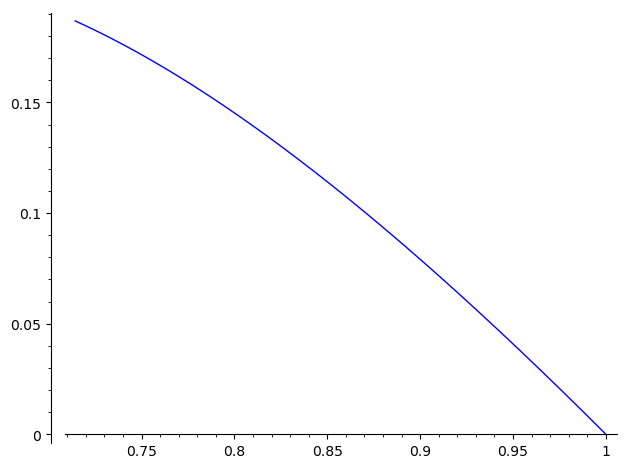

In [7]:
plot(Profit1.substitute(gamma=tgamma,Y_1=Y1,w_2=tw2),(w_1,bottom1,top1))

You can explore by changing the parameters given in the cell prior to the plot.  Once you have changed the parameter, rerun the cell then rerun the cell with the plot in it.

At best, this just shows that it won't be profitable for the firm to raise its wage above the point where the type H worker just becomes indifferent.  I we want to do more we have to use the derivative

In [8]:
dProfit1 = Profit1.derivative(w_1)
show(dProfit1)

2*(Y_1 - w_1)*(gamma - 1)^2*((2*(gamma - 1)*w_1 + (gamma + 1)*w_2)/((gamma - 1)*w_1 + (gamma - 1)*w_2) - 1)*((2*(gamma - 1)*w_1 + (gamma + 1)*w_2)*(gamma - 1)/((gamma - 1)*w_1 + (gamma - 1)*w_2)^2 - 2*(gamma - 1)/((gamma - 1)*w_1 + (gamma - 1)*w_2)) + (gamma - 1)^2*((2*(gamma - 1)*w_1 + (gamma + 1)*w_2)/((gamma - 1)*w_1 + (gamma - 1)*w_2) - 1)^2 - 1

This is somewhat useless, but we can try:

[w_1 == (160/313)]

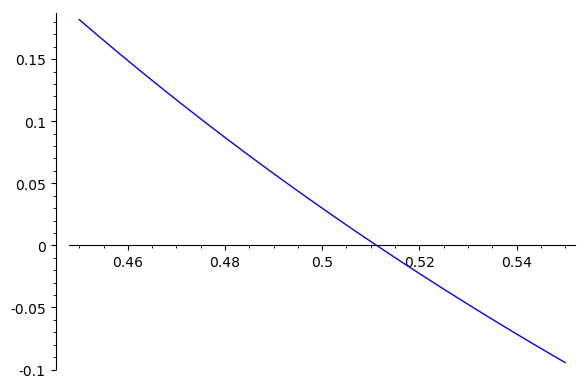

In [9]:
dProfit1_sub = dProfit1.substitute(w_2=gamma*w_1/2+(1-gamma)*w_1)
tgamma = 3/5
Y1 = 1
p1=plot(dProfit1_sub.substitute(Y_1=Y1,w_2=1/2,gamma=tgamma),(w_1,.45,.55))
show(solve(dProfit1_sub.substitute(Y_1=Y1,gamma=tgamma,w_2=gamma*w_1/2+(1-gamma)*w_1),w_1))
p1

This is somewhat more helpful.  When $\lambda$ is $\frac{3}{5}$ at least, the derivative of firm 1's profit function at the boundary where $\lambda\frac{w_1}{2}+(1-\lambda)w_1$ is positive for small values of $\lambda$ and is negative as long as $w_2$ is larger than about $3.5$.

Here is another exercise that gets closer to what we want:

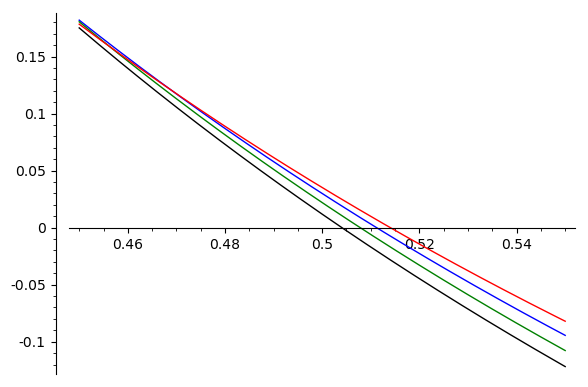

In [10]:
p2=plot(dProfit1_sub.substitute(gamma=1/5,Y_1=1),(w_1,.45,.55),color='black')
p3=plot(dProfit1_sub.substitute(gamma=2/5,Y_1=1),(w_1,.45,.55),color='green')
p4=plot(dProfit1_sub.substitute(gamma=4/5,Y_1=1),(w_1,.45,.55),color='red')
p1+p2+p3+p4

This suggests that profits are more likely to decline once the wage hits the boundary the higher is $\lambda$.

# Small difference between $w_1$ and $w_2$
After seeing some tricks to cope with the algebraic complexity, we can try the more daunting problem when wages are closer together.

Wages are closer together means that  $\lambda\frac{w_1}{2}+(1-\lambda)w_1\le w_2$. So our basic restriction on wages is that $w_1\le \frac{w_2}{\frac{\lambda}{2}+(1-\lambda)}$.
## Strategy for type H
In this case the high type workers will play a mixed strategy. In order for them to do so, they must be indifferent, so 

$$ \lambda\{\pi_H \frac{w_1}{2}+\left(1-\pi_H\right)w_1\}+\{1-\lambda\}w_1= \lambda \{\pi_H w_2+(1-\pi_H)\frac{w_2}{2}\}+\left(1-\lambda\right)w_2\}$$ 
Now we just need some familiar techniques.


In [11]:
f1 = gamma*(pi_H*(w_1/2)+(1-pi_H)*w_1)+(1-gamma)*w_1
f2 = gamma*(pi_H*w_2+(1-pi_H)*(w_2/2))+(1-gamma)*w_2
sol = solve(f1==f2,pi_H)
PieH=sol[0].rhs()
show(PieH)


((gamma - 2)*w_2 + 2*w_1)/(gamma*w_1 + gamma*w_2)

There are two checks you might want to do here.  First, if  $w_1=w_2$ the solution should be $\frac{1}{2}$ - it is pretty each to see that is true, which is a hint we have it coded correctly.  Second, if $\lambda$ happens to be $1$ then we are in exactly the same position is we would be with complete information.  Therefore, the strategy should be the same as the one we found in the previous notebook
$$
\frac{2w_1-w_2}{w_1+w_2}
$$


In [12]:
show(PieH.substitute(gamma=1).full_simplify())

(2*w_1 - w_2)/(w_1 + w_2)

In [13]:
show(PieH.substitute(w_2=gamma*w_1/2+(1-gamma)*w_1).full_simplify())

1

As in the previous section, if you try to substitute $\lambda=0$ into the expression, you'll get a divide by zero error and you won't be able to solve it.  That is because a high type worker will find applying to firm 1 to be a dominant strategy for even the tiniest difference between $w_1$ and $w_2$ for values of $\lambda$ that are strictly higher than 0.
## Strategy for type L
The payoff when such a worker applies to the high wage firm is

$$
\lambda\left\{(1-\pi_H)w_1\right\}+(1-\lambda)*\left\{\pi_L\frac{w_1}{2}+(1-\pi_L)w_1\right\}
$$
On the other hand, if the low type worker applies to firm 2, the payoff is

$$
\lambda\left\{\pi_H w_2\right\}+(1-\lambda)\left\{\pi_L w_2+(1-\pi_L)\frac{w_2}{2}\right\}
$$
These must be the same, so we can find the corresponding mixing probability.  To do it, we want to substitute the corresponding value for $\pi_H$.

In [14]:
f1L = gamma*((1-PieH)*w_1)+(1-gamma)*(pi_L*(w_1/2)+(1-pi_L)*w_1)
f2L = gamma*(PieH*w_2)+(1-gamma)*(pi_L*w_2+(1-pi_L)*(w_2/2))
show([f1L,f2L])

[-gamma*w_1*(((gamma - 2)*w_2 + 2*w_1)/(gamma*w_1 + gamma*w_2) - 1) + 1/2*(2*(pi_L - 1)*w_1 - pi_L*w_1)*(gamma - 1),
 1/2*((pi_L - 1)*w_2 - 2*pi_L*w_2)*(gamma - 1) + ((gamma - 2)*w_2 + 2*w_1)*gamma*w_2/(gamma*w_1 + gamma*w_2)]

In [15]:
S2 = solve(f1L==f2L,pi_L)
PieL = S2[0].rhs()
show(PieL)

((gamma - 3)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2)

Notice that the solution for $\pi_L$ relies on the solution for $\pi_H$, so we can solve the together like this:

In [16]:
both= solve((f1==f2,f1L==f2L),(pi_H,pi_L))
show(both)

[[pi_H == ((gamma - 2)*w_2 + 2*w_1)/(gamma*w_1 + gamma*w_2), pi_L == ((gamma - 3)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2)]]

As before, we need to do some checks to make sure the code is right.  First, if wages are the same at both firms, the mixing probability should be $\frac{1}{2}$

In [17]:
show(PieL.substitute(w_2=w_1).full_simplify())

1/2

Next, we check the boundary where $w_2=\lambda\frac{w_1}{2}+(1-\lambda)w_1$  to make sure the solution is the same as the one we computed on the same boundary when we looked at large differences

In [18]:
show(PieL.substitute(w_2=gamma*w_1/2+(1-gamma)*w_1).full_simplify())
show(pieL.substitute(w_2=gamma*w_1/2+(1-gamma)*w_1).full_simplify())

(gamma^2 - 5*gamma + 2)/(gamma^2 - 5*gamma + 4)

(gamma^2 - 5*gamma + 2)/(gamma^2 - 5*gamma + 4)

There are two additional checks, the extreme cases where $\lambda$ is equal to either $0$ or $1$.  When we set $\lambda=1$, then the strategy should reduce the the same strategy we used in the workbook on directed search with complete information -.i.e
$$
\frac{2w_1-w_2}{w_1+w_2}
$$

In [19]:
show(PieH.substitute(gamma=1))

(2*w_1 - w_2)/(w_1 + w_2)

The last case to check is the one where $\lambda=0$.  Again this should reduce to the answer we got before.  However:

In [20]:
show(PieL.substitute(gamma=0))

-(2*w_1 - 3*w_2)/(w_1 + w_2)

The reason this is happening is that it becomes a dominant strategy for type H workers to apply to firm 1 even when $\lambda>0$ but close enough to $1$. So if we hold the wage offers constant and shrink $\gamma$, $\pi_H$ will have to be larger than 1 in order for the equation defining $\pi_H$ to hold.

In [21]:
t = gamma*PieH+(1-gamma)*PieL
show(t.full_simplify())

w_2/(w_1 + w_2)

Again, so far so good.  So we can tackle the profit function.
## Firm 1 profits
The profit function is given by
$$
\Pi(w_1,w_2) = (Y_1-w_1)(1 - \left\{\lambda^2(1-\pi_H(w_1,w_2)^2+(1-\lambda)^2(1-\pi_L(w_1,w_2))^2+2\lambda(1-\lambda)(1-\pi_H)(1-\pi_L)\right\}^2)
$$

However, one of the keys to solving this problem is to realize that the firm doesn't actually care what type of worker they hire.  It is just a convention (a prejudice, a bias).  They just care whether or not they get an applicant.  So from the firm's perspective, the probability they get an applicant is 
$\lambda\pi_H+(1-\lambda)\pi_L$.  For that reason, the probability that the firm gets at least one applicant can be written as
$$
1-\left(\lambda(1-\pi_H)+(1-\lambda)(1-\pi_L)\right)^2
$$
The next picture show what the functions $\pi_L$, $\pi_H$, and $\lambda\pi_H+(1-\lambda)\pi_L$ look like as $w_1$ varies around $w_2$.  You can set the values at the top of the cell, but the defaults convey the ides. 

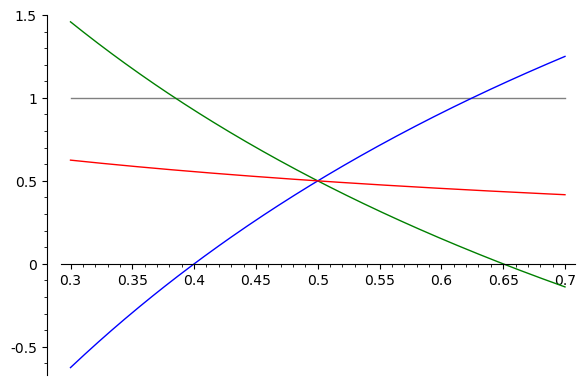

In [28]:
tw2=1/2
lb = 3/10
tgamma=4/10
top = 7/10
def ul(w_1):
    return 1
pl0 = plot(ul(w_1),(w_1,lb,top),color='grey')
pl1 = plot(PieL.substitute(w_2=tw2,gamma=tgamma),(w_1,lb,top),color='green')
pl2 = plot(PieH.substitute(w_2=tw2,gamma=tgamma),(w_1,lb,top))
pl3 = plot(tgamma*PieH.substitute(w_2=tw2,gamma=tgamma)+(1-tgamma)*PieL.substitute(w_2=tw2,gamma=tgamma),(w_1,lb,top),color='red')
pl0+pl1+pl2+pl3

The red line shows the probability with which the firm believes the applicant will apply as a function of the wage it offers.  The important thing to understand is that, unlike in the model with complete information, the firm believes that if it raises it wage, the probability the  applicant will apply will <em>decline</em>.

Now we have to tackle the trickiest part of this problem.

The two blue lines representing $\pi_H$ and $\pi_L$ both go above 1 and below zero.  For example, the green line represents $\pi_L$.  The point where it crosses the horizontal axis is where $\pi_L$ becomes 0.  Notice that happens while $\pi_H$ is still less than 1.  At this point the red line still represents the application probability from the firm's perspective.  Yet if you raise $w_1$ even more, $\pi_L$ will just continue to be zero. 

This is going to present the biggest problem finding the application probability for the type L worker since it relies on the type H application probability.  In the picture above, notice that the green line crosses 1 at a higher wage than the one at which the blue line crosses 1.  That means the application probability for type L is not going to be correct.   So lets try to fix this first.

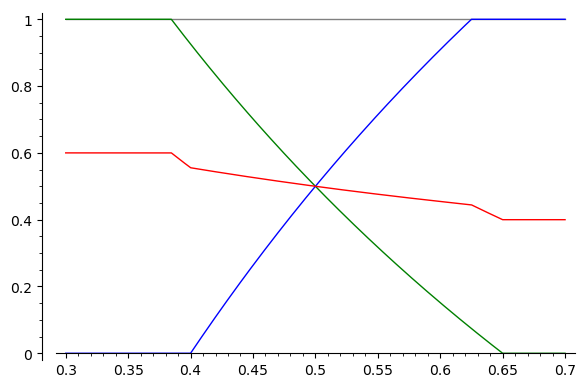

In [29]:
PieH1 = min_symbolic(1,max_symbolic(0,PieH))
PieL1 = min_symbolic(1,max_symbolic(0,PieL))
pl0 = plot(ul(w_1),(w_1,lb,top),color='grey')
pl1 = plot(PieL1.substitute(w_2=tw2,gamma=tgamma),(w_1,lb,top),color='green')
pl2 = plot(PieH1.substitute(w_2=tw2,gamma=tgamma),(w_1,lb,top))
pl3 = plot(tgamma*PieH1.substitute(w_2=tw2,gamma=tgamma)+(1-tgamma)*PieL1.substitute(w_2=tw2,gamma=tgamma),(w_1,lb,top),color='red')
pl0+pl1+pl2+pl3

For the next bit, I'll leave out the corrections just to make things easier to read.

In [24]:
High_no = gamma*(1-PieH)
hn = High_no.full_simplify()
show(hn)
Low_no = (1-gamma)*(1-PieL)
ln = Low_no.full_simplify()
show(ln)
High_no1 = gamma*(1-PieH1)
hn1 = High_no1.full_simplify()
show(hn1)
Low_no1 = (1-gamma)*(1-PieL1)
ln1 = Low_no1.full_simplify()
show(ln1)


((gamma - 2)*w_1 + 2*w_2)/(w_1 + w_2)

-((gamma - 3)*w_1 + 2*w_2)/(w_1 + w_2)

-gamma*(min(1, max(0, ((gamma - 2)*w_2 + 2*w_1)/(gamma*w_1 + gamma*w_2))) - 1)

gamma*(min(1, max(0, ((gamma - 3)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2))) - 1) - min(1, max(0, ((gamma - 3)*w_2 + 2*w_1)/((gamma - 1)*w_1 + (gamma - 1)*w_2))) + 1

This now allows us to give a simplified coding of the profit function:

In [25]:
P2 = (Y_1-w_1)*(1-(hn+ln)^2)
Profit2 = P2.full_simplify()
show(Profit2)
P21 = (Y_1-w_1)*(1-(hn1+ln1)^2)
Profit21 = P21.full_simplify()


((Y_1 - w_1)*w_2^2 + 2*(Y_1*w_1 - w_1^2)*w_2)/(w_1^2 + 2*w_1*w_2 + w_2^2)

One surprise is that this Profit function doesn't depend on $\lambda$.

To understand this, first notice that it applies only for a very restricted pair of wages. The restriction depends on $\lambda$, so it is not correct to say that the profit function does not depend on $\lambda$.

However, within the appropriate interval of wages, we can verify it. 

If you look at the profit function in the cell that defines it, focus on the probability term.  It is
$$
1-\left(\lambda(1-\pi_H)+(1-\lambda)(1-\pi_L)\right)^2.
$$
Expland the squared expression by
substituting the corresponding solutions for $\pi_L$ and $\pi_H$
$$
\left(\frac{{\left(\gamma - 2\right)} w_{1} + 2 \, w_{2}}{w_{1} + w_{2}}-\frac{{\left(\gamma - 3\right)} w_{1} + 2 \, w_{2}}{w_{1} + w_{2}}\right)^2
$$
Subtracting this expression from 1 then multiplying by $Y_1-w_1$ give the dislayed expression above.  So $\lambda$ cancels.


Now we can try the methods we used in the previous section to get a feel for what this function looks like.  Here I'll put the corrections back in.


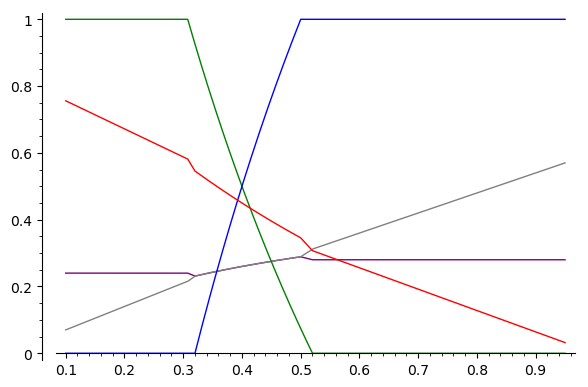

In [26]:
Y = 1
lb=1/10
tw2 = 40/100
tgamma = 4/10
top = 95/100
#show([bottom1,top1])
payoffL1 = gamma*(1-PieH1)*w_1+(1-gamma)*(w_1*PieL1/2 +w_1*(1-PieL1))
payoffL2 = gamma*PieH1*w_2+(1-gamma)*(w_2*PieL1+(1-PieL1)*w_2/2)
pl = plot(payoffL2.substitute(w_2=tw2,gamma=tgamma),(w_1,lb,top),color='purple')
pl0 = plot(payoffL1.substitute(w_2=tw2,gamma=tgamma),(w_1,lb,top),color='grey')
pl1 = plot(PieL1.substitute(w_2=tw2,gamma=tgamma),(w_1,lb,top),color='green')
pl2 = plot(PieH1.substitute(w_2=tw2,gamma=tgamma),(w_1,lb,top),color='blue')
#pl3 = plot(tgamma*PieH1.substitute(w_2=tw2,gamma=tgamma)+(1-tgamma)*PieL1.substitute(w_2=tw2,gamma=tgamma),(w_1,lb,top))
pl4 = plot(Profit21.substitute(w_2=tw2,gamma=tgamma,Y_1=Y),(w_1,lb,top),color='red')
#pl5 = plot(Profit21.substitute(w_2=tw2,gamma=6/10,Y_1=Y),(w_1,lb,top),color='red')
pl+pl0+pl1+pl2+pl4

This picture shows the main idea.  The profit function for the firm is indicated by the red line.  The wage of the other firm is indicated by the point where the green and blue lines cross each other.  These line are the probabilities with the L and H type workers respectively apply to firm 1.  The fact that the peak of the red line occurs to the left of the equal wage point indicates the the best reply to any wage by the other firm will be a strictly lower wage.  As a consequence, this game does not have a pure strategy equilibrium.  This is a consequence of the fact that L and H type workers are equally productive.

In [27]:
var('Y_H','Y_L')
YH1 = 1
YL1 = 60/100
tw2H = 75/100
tgamma = 5/10
lb=((1-tgamma)*tw2H)/(tgamma+(1-tgamma)/2)
top = 95/100
Profit3_raw = gamma^2 * (1-(1-PieH)^2)*(Y_H-w_1) + (1-gamma)^2 *(1-(1-PieL)^2)*(Y_L-w_1) + 2*gamma*(1-gamma)*(PieH*(Y_H-w_1)+(1-PieH)*PieL*(Y_L-w_1))
Profit3 = gamma^2 * (1-(1-PieH1)^2)*(Y_H-w_1) + (1-gamma)^2 *(1-(1-PieL1)^2)*(Y_L-w_1) + 2*gamma*(1-gamma)*(PieH1*(Y_H-w_1)+(1-PieH1)*PieL1*(Y_L-w_1))
pH = plot(Profit3.substitute(Y_H=YH1,Y_L=YL1,w_2=tw2H,gamma=tgamma),(w_1,lb,top),color='red')

pL = plot(Profit3.substitute(Y_H=YH1,Y_L=YL1,w_2=tw2L,gamma=6/10),(w_1,lb,top),color='red')
pl = plot(payoffL2.substitute(w_2=tw2H,gamma=tgamma),(w_1,lb,top),color='purple')
pl0 = plot(payoffL1.substitute(w_2=tw2H,gamma=tgamma),(w_1,lb,top),color='grey')
pl1 = plot(PieL1.substitute(w_2=tw2H,gamma=tgamma),(w_1,lb,top),color='green')
pl2 = plot(PieH1.substitute(w_2=tw2H,gamma=tgamma),(w_1,lb,top),color='blue')
dProfit3 = Profit3_raw.derivative(w_1)
dProfit3_eq = dProfit3.substitute(Y_H=YH1,Y_L=YL1,w_1=w_2,gamma=tgamma)
der =plot(dProfit3_eq,(w_2,lb,top),color='black')
der+pH+pL+pl+pl0+pl1+pl2


NameError: name 'tw2L' is not defined

In [ ]:
solve(dProfit3_eq -w_2,w_2)

# Strategy rules

So now we can write the strategy rule.  We'll continue to assume that $w_1\ge w_2$ because if it isn't you can find the appropriate strategy just by interchanging $w_1$ and $w_2$ in the formulas.  We need one strategy rule for each of the two types $H$  and $L$.  Start with $H$: 
$$
\pi_H(w_1, w_2) = \left\{\begin{array}{lr}
        1 & \text{ if } \lambda\frac{w_1}{2}+(1-\lambda)w_1\ge w_2\\
        0 & \text{if } w_1 < \lambda\frac{w_2}{2}+(1-\lambda)w_2\\
        \frac{{\left(\gamma - 2\right)} w_{2} + 2 \, w_{1}}{\gamma w_{1} + \gamma w_{2}} & \text{ otherwise. }       
        \end{array}\right. 
$$

Now for $L$,

$$
\pi_L(w_1, w_2) = \left\{\begin{array}{lr}
  1 & \text{ if } (1-\lambda)\frac{w_1}{2} \ge w_2 \\
  \frac{(1-\lambda)(2w_1-w_2)}{(w_1+w_2)-\lambda(w_1-w_2)} & \text{ if } \lambda\frac{w_1}{2}+(1-\lambda)w_1\ge w_2; (1-\lambda)\frac{w_1}{2} < w_2 \\
  \frac{(3-\lambda)w_2-2w_1}{(1-\lambda)(w_1+w_2)} & \text{if } w_1>w_2; \lambda\frac{w_1}{2}+(1-\lambda)w_1\le w_2 \\
  \frac{(3-\lambda)w_1-2w_2}{(1-\lambda)(w_2+w_1)} & \text{if } w_2>w_1; \lambda\frac{w_2}{2}+(1-\lambda)w_2\le w_1 \\ 
  \frac{(1-\lambda)(2w_2-w_1)}{(w_2+w_1)-\lambda(w_2-w_1)} & \text{ otherwise. } 
\end{array}\right.
$$

The last bit is to deal with the profit function.  As mentioned, the firm makes a profit whenever is  has at least one applicant, so we can write the profit function for firm 1 this way:

$$
\Pi(w_1,w_2) = (Y_1-w_1)(1 - \left\{\lambda^2(1-\pi_H(w_1,w_2)^2+(1-\lambda)^2(1-pi_L(w_1,w_2))^2+2\lambda(1-\lambda)(1-\pi_H)(1-\pi_L)\right\}
$$